## Exploratory Data Analysis (EDA) for Student performance Indicator

#### Dataset if from Kaggle: Reason to select such dataset is, it has all kind of features like numerical, categorical, etc.!
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977


# Problem Statement
To understand the influence of the parents background, test preparation, Gender, Ethnicity, etc on students performance

# Let us install necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings #module which allows Python code to issue warnings to users in certain situations
warnings.filterwarnings('ignore') #This is used to ignore warning messages

In [3]:
#reading the CSV file as Dataframe using pandas
df=pd.read_csv('studentsPerformance.csv')

In [4]:
#lets check the shape of this dataset
df.shape

(1000, 8)

In [5]:
#shows top 5 record
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## lets clean the data

In [6]:
#checking the data information first and the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# lets chech if their are any missing value
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Seems there is no missing value

In [8]:
#lets check for if there are any duplicates
df.duplicated().sum() #seems no duplicate as well

0

## let us explore the unique values and thier frequency present in each column

In [9]:
#using nunique will get the frequecy of the term
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## obervation 1
#### - This data seems to have 5 categorical features and 3 Numerical features based on the 8 columns that we can see
#### - We can check if the features are string then will tag it as categories and if they are not string then it is numerical

In [10]:
# To check str or object we have boolean expression
df['math score'].dtype != 'O'

True

In [11]:
# variable c to capture columns of the dataset
col=df.columns

In [12]:
# looping it over all columns or we use list comprehension
'''
categorical_features=[]
numeric_features=[]
for feature in col:
    if (df[feature].dtype=='O'):
        categorical_features.append(feature)
    elif(df[feature].dtype!='O'):
        numeric_features.append(feature)
'''
categorical_features=[feature for feature in col if(df[feature].dtype=='O')]
numerical_features=[feature for feature in col if(df[feature].dtype!='O')]

        

In [13]:
#printing all features
print('{}-categorical features: {}'.format(len(categorical_features), categorical_features))
print('{}-numerical features : {}'.format(len(numerical_features), numerical_features))

5-categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
3-numerical features : ['math score', 'reading score', 'writing score']


In [14]:
# using unique will get unique terms in each column for categorical features
print("Unique terms in each column of categorical_features\n")
for c_feat in categorical_features:
    uni_val = df[c_feat].unique()
    print(f" {c_feat} : {uni_val}")    

Unique terms in each column of categorical_features

 gender : ['female' 'male']
 race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
 parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 lunch : ['standard' 'free/reduced']
 test preparation course : ['none' 'completed']


In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Adding Numerical feature columns for "Total Score" and "Average"

In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Lets check how many students secured full marks and below 30 also lets use count(), it will count the number of rows in the specifed column that have a value (i.e., not null).

In [17]:
# first check True/False for score ==100 then it will consider only True lines into consideration,non-null value
math_full = df[df['math score'] == 100]['average'].count()
print(f"Number of students with full marks in maths: {math_full}")
reading_full = df[df['reading score'] == 100]['average'].count()
print(f"Number of students with full marks in Reading: {reading_full}")
writing_full = df[df['writing score'] == 100]['average'].count()
print(f"Number of students with full marks in writing: {writing_full}")


Number of students with full marks in maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in writing: 14


In [18]:

math_below_25 = df[df['math score'] <=25]['average'].count()
print(f"Number of students with full marks in maths: {math_below_25}")
reading_below_25 = df[df['reading score'] <=25]['average'].count()
print(f"Number of students with full marks in Reading: {reading_below_25}")
writing_below_25 = df[df['writing score'] <=25]['average'].count()
print(f"Number of students with full marks in writing: {writing_below_25}")


Number of students with full marks in maths: 7
Number of students with full marks in Reading: 4
Number of students with full marks in writing: 5


### Observation 2
- we can get an insight about the worst performance in math and best performance in reading

## Visualizing will help us conclude by exploring data representation
- we can use Histogram
- we can also use KDE (Kernal Disrtibution Estimate) function
### using these visuals we will get insights about who is performing well between male and female for total and average score

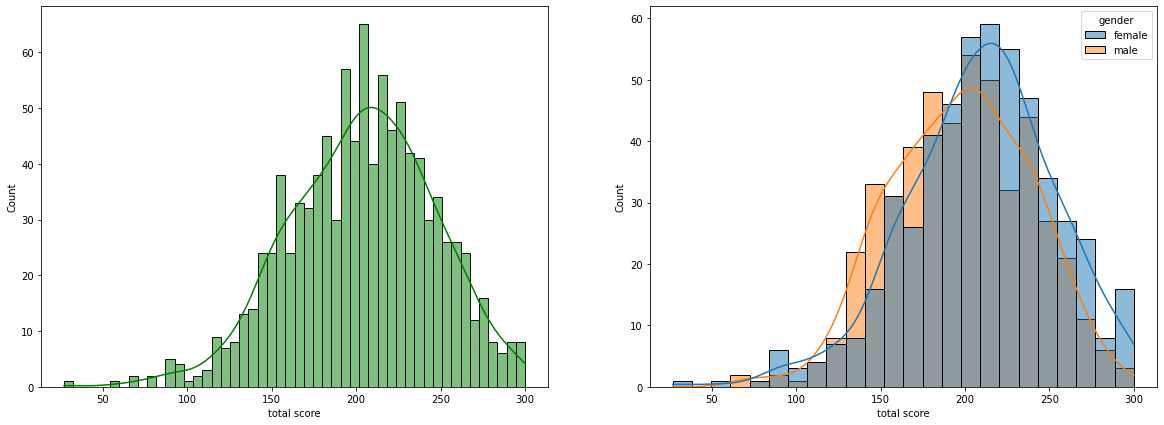

In [19]:
#creating 2 subplots for total score
fig, axs = plt.subplots(1, 2, figsize=(20, 7)) 
# 121 is 1st row 2nd column 1st index position we are creating first subplot
plt.subplot(121) 
#we take entire data as df, with x axis metric and with 50 bins of vertical bars, kde will draw distribution curve
sns.histplot(data=df,x='total score',bins=50,kde=True,color='g') 
# 122 is 1st row 2nd column 2nd index position we are creating second subplot
plt.subplot(122) 
#we take entire data as df, with x axis metric and  kde will draw distribution curve but this time considers hue curve
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

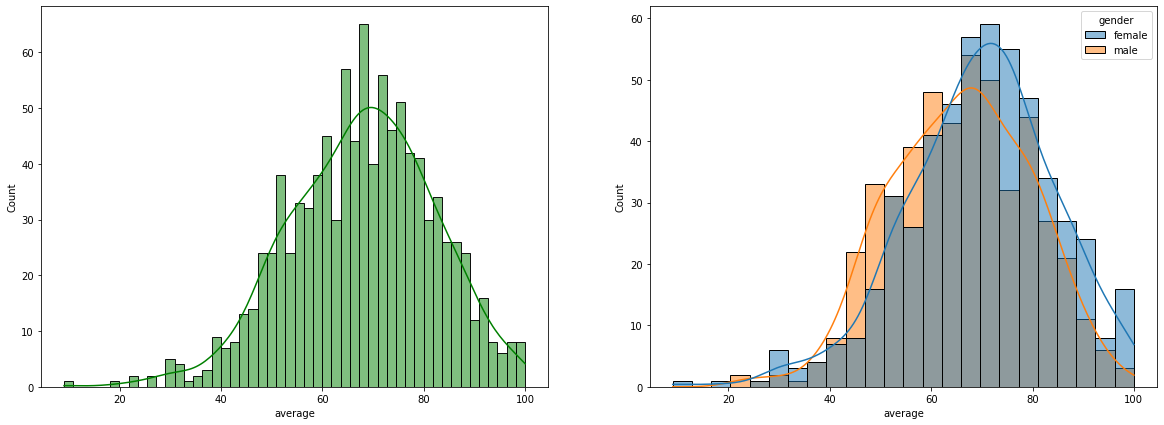

In [20]:
#creating 2 subplots for average score
fig, axs = plt.subplots(1, 2, figsize=(20, 7)) 
# 121 is 1st row 2nd column 1st index position we are creating first subplot
plt.subplot(121) 
#we take entire data as df, with x axis metric and with 50 bins of vertical bars, kde will draw distribution curve
sns.histplot(data=df,x='average',bins=50,kde=True,color='g') 
# 122 is 1st row 2nd column 2nd index position we are creating second subplot
plt.subplot(122) 
#we take entire data as df, with x axis metric and  kde will draw distribution curve but this time considers hue curve
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

## Observation 3
- Based on the curves if we can see females perfomed more than males in both total score and average

### Now let us check how lunch is affecting score overall as well as based on gender

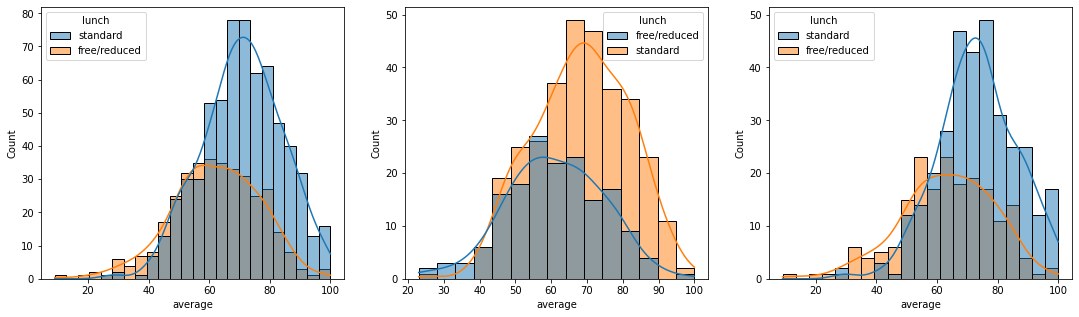

In [21]:
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.show()

### Observation 4
- Every plot shows that standard lunch helps student to perform well over all, either it is male or female

### similarly let us check how parental level of eduction is affecting score overall as well as based on gender


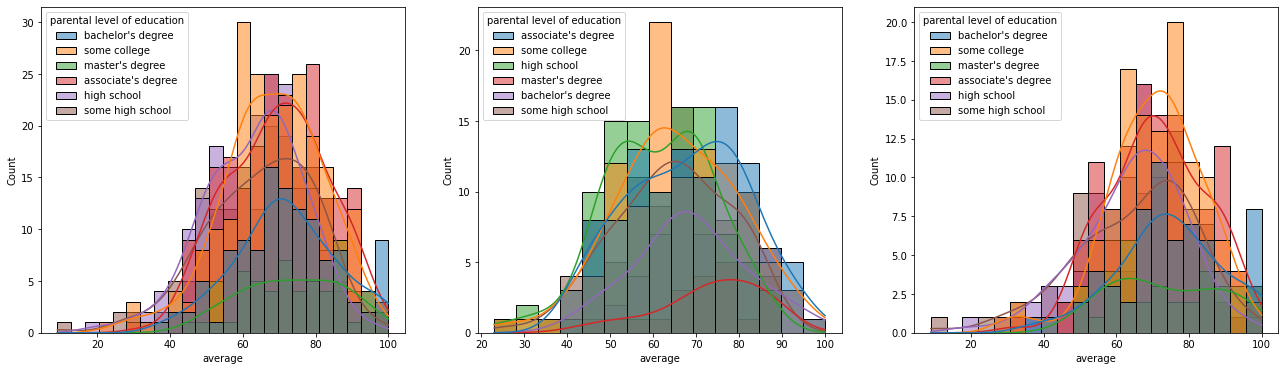

In [22]:
plt.subplots(1,3,figsize=(30,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

#### Observation 5
- In general parent's education is not helping student to perform well in exam.
- 2nd plot shows that males students perform well whose parents education level is associte degree or master degree
- 3rd plot we can see there is no effect of parent's education on female students.

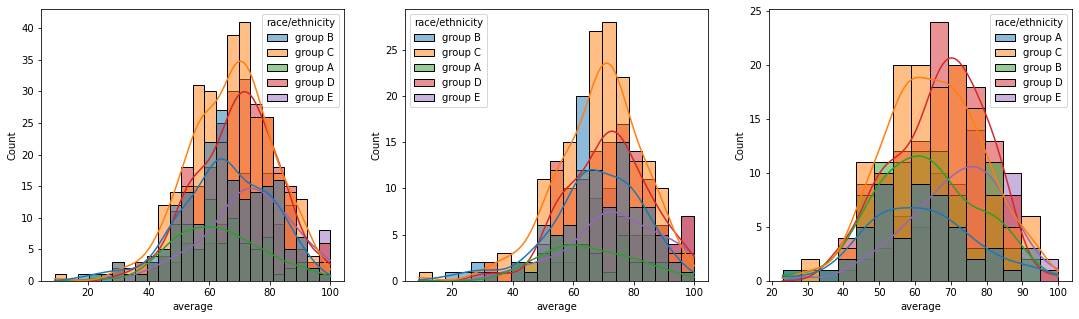

In [23]:
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#### Observation 6
- Students of group A and group E tends to perform poorly in exam.
- Students of group A and group E tends to perform poorly in exam irrespective of whether they are male or female

#### Maximumum score of students in all three subjects

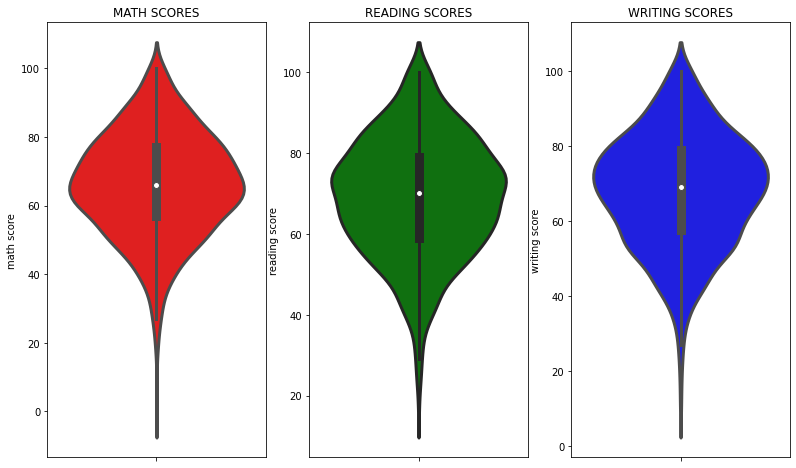

In [24]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Observation7
- From the above three plots its clearly visible that most of the students score in between 60-80 based on the density of the plot in Maths whereas in reading and writing most of them score from 50-80

we know the Unique terms in each column of categorical_features lets plot differnetly 

 - gender : ['female' 'male']
 - race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
 - parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 - lunch : ['standard' 'free/reduced']
 - test preparation course : ['none' 'completed']

### Multivariate analysis using pieplot

In [25]:
#counting the number of occurrences of each gender
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

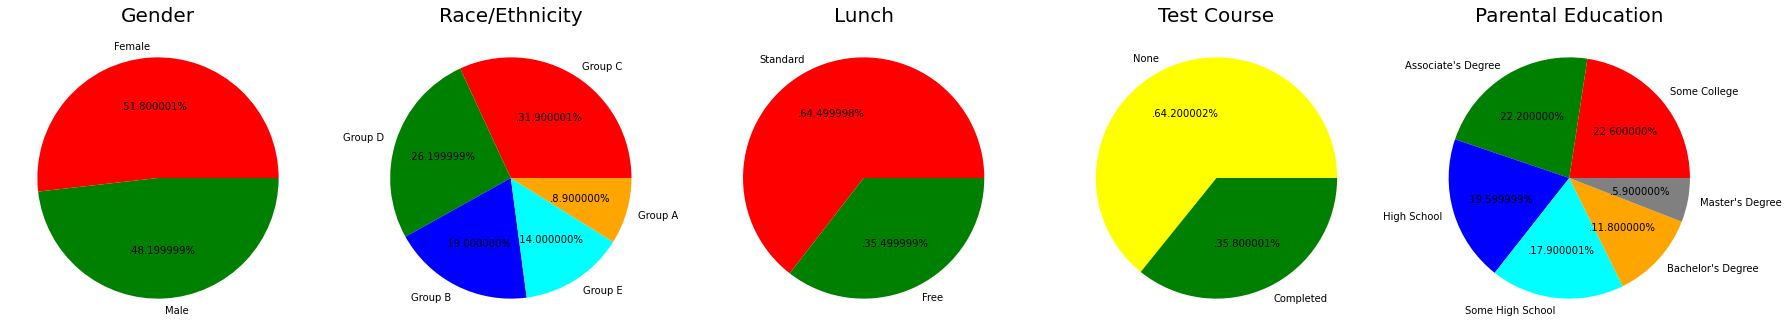

In [27]:
#setting the width of the figure to 25 inches and the height to 10 inches
plt.rcParams['figure.figsize'] = (25, 10)

#______________1st pie chart_________________________________
#subplot with one row, five columns, and placing the plot in the first column
plt.subplot(1, 5, 1)
#counting the number of occurrences of each gender and storing it in size
size = df['gender'].value_counts()
#setting the labels for each slice of the pie chart
labels = 'Female', 'Male' 
#setting the colors for each slice of the pie chart
color = ['red','green']

#creating pie chart with given size and parameters
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
#setting the title of the plot to "Gender"
plt.title('Gender', fontsize = 20)
plt.axis('off')


#______________2nd pie chart_________________________________
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


#______________3rd pie chart_________________________________
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

#______________4th pie chart_________________________________
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['yellow','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

#______________5th pie chart_________________________________
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout() #this is not to overlap between chart with their axes
plt.grid()

plt.show()

### Observation 8
- Number of Male and Female students is almost equal
- Group C has more number of students
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Feature Wise Visualization
#### GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

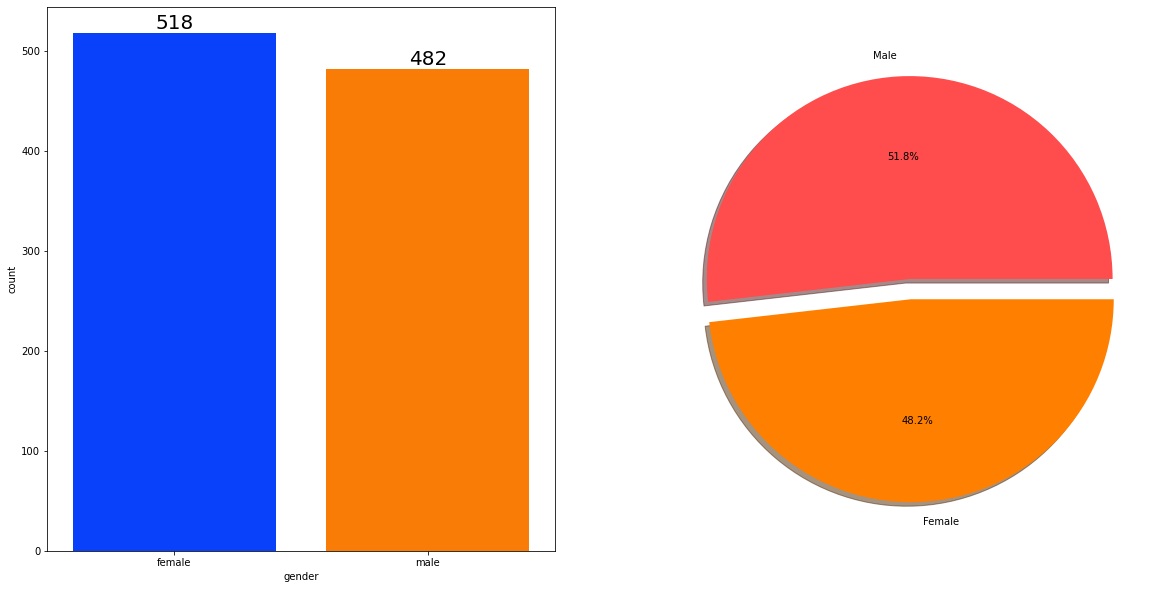

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [43]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### calculating the mean for all the numerical value

In [49]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [52]:
#storing values 
female_math_score=gender_group['math score'][0]
female_avg_score=gender_group['average'][0]
male_math_score=gender_group['math score'][1]
male_avg_score=gender_group['average'][1]

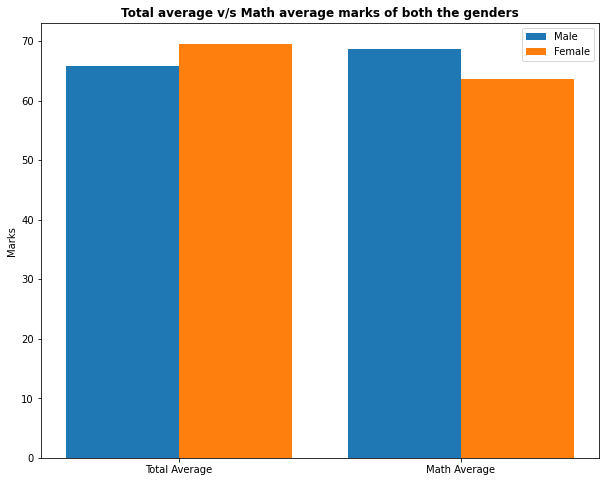

In [60]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [female_avg_score, female_math_score]
male_scores = [male_avg_score, male_math_score]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

### RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

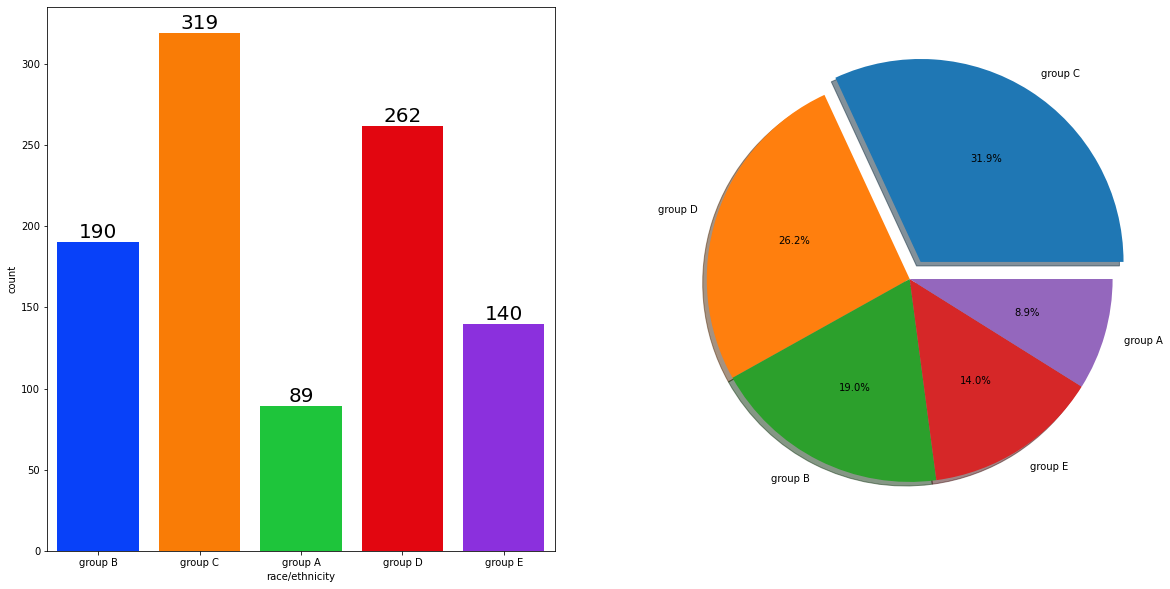

In [61]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

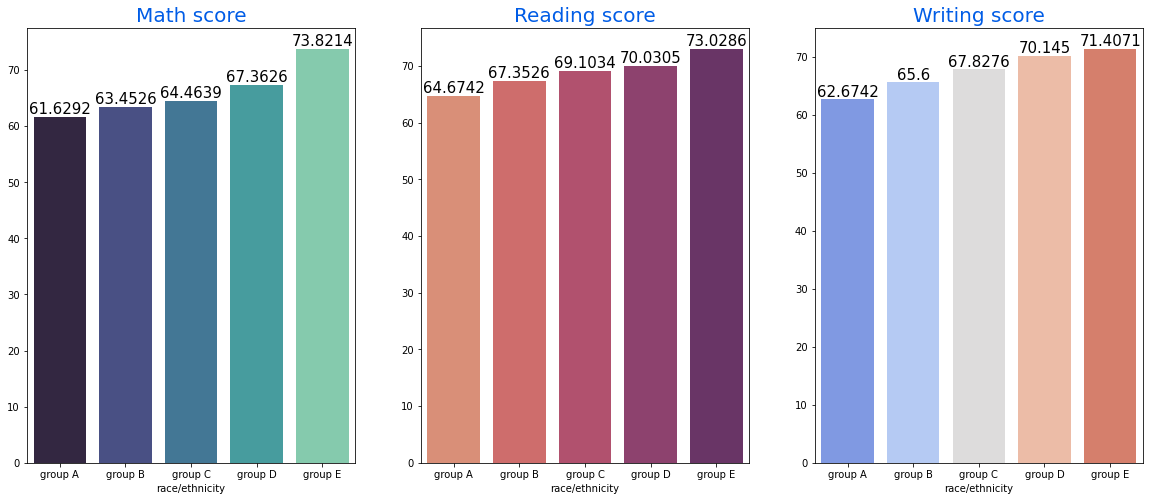

In [62]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### PARENTAL LEVEL OF EDUCATION COLUMN¶
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

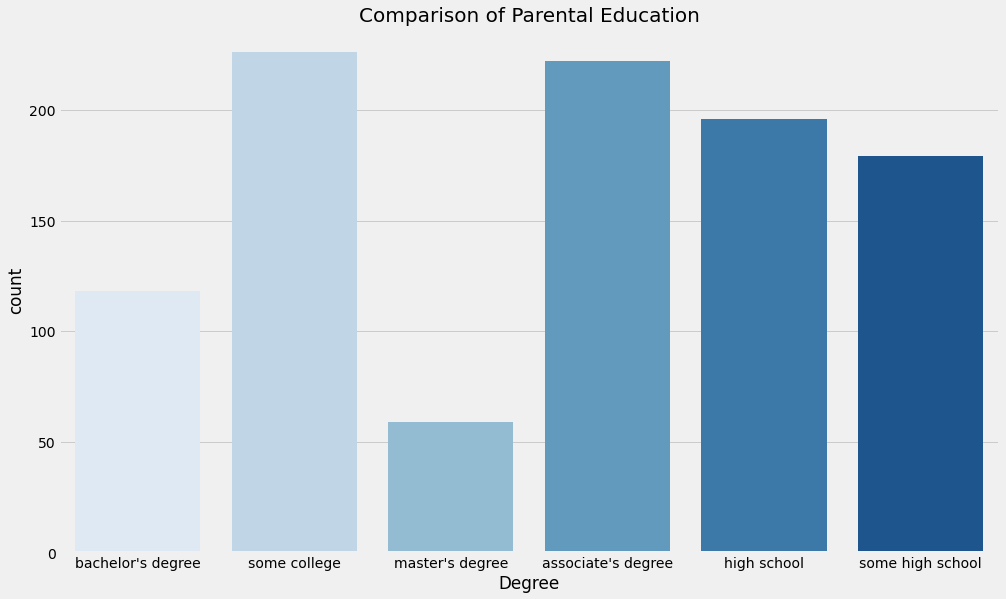

In [63]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

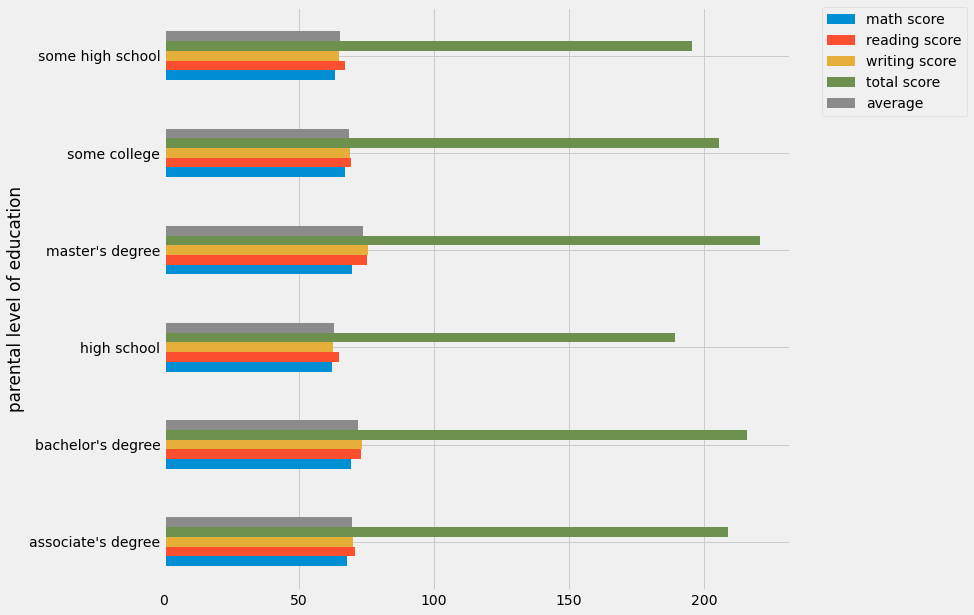

In [64]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- The score of student whose parents possess master and bachelor level education are higher than others.

#### LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

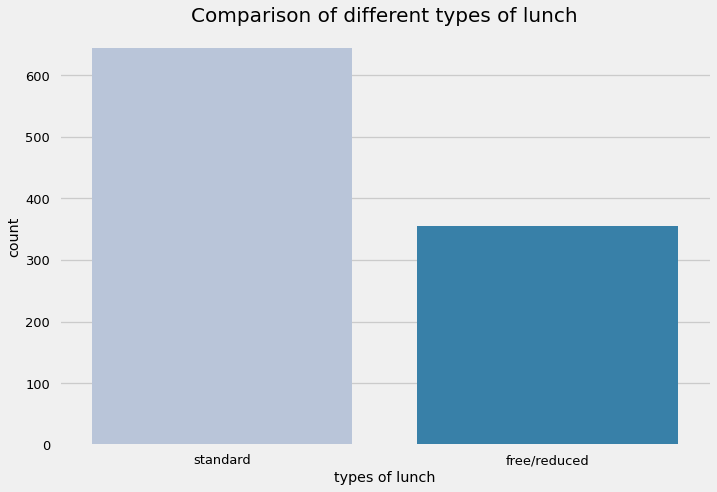

In [65]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

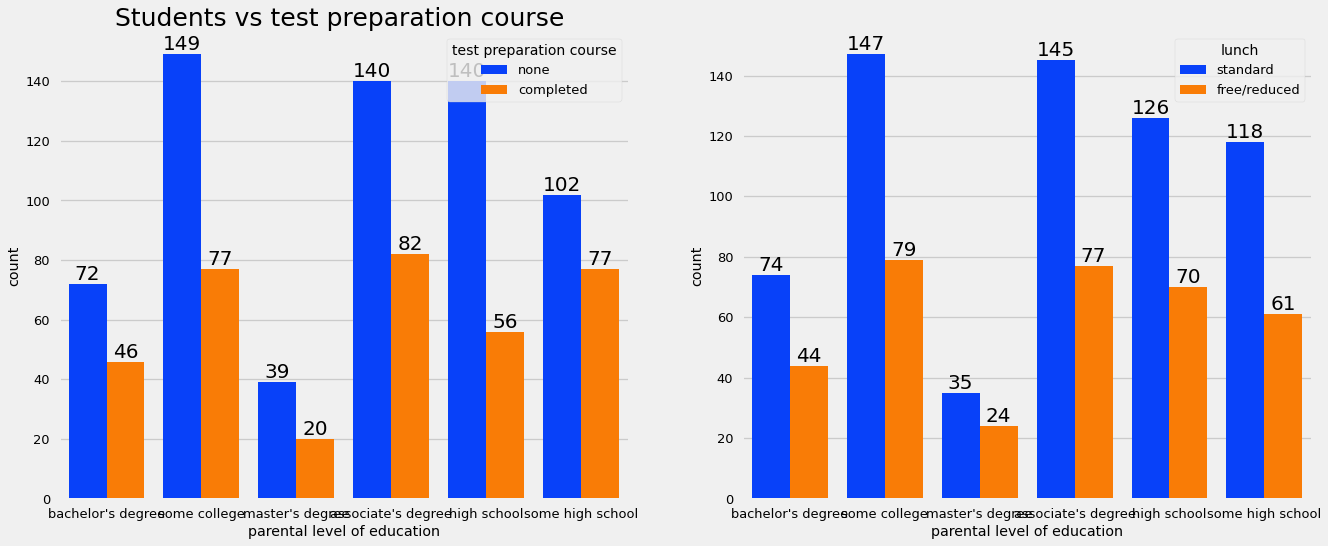

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

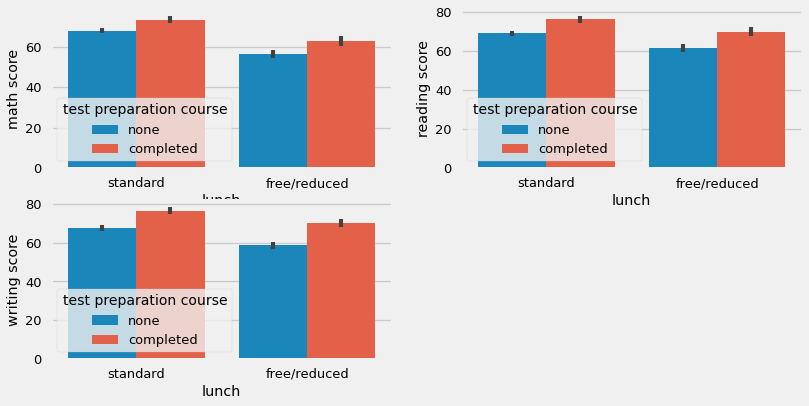

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### CHECKING OUTLIERS

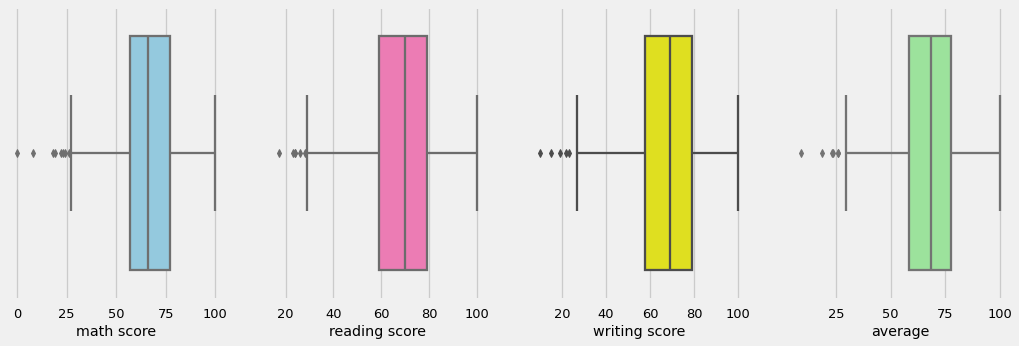

In [68]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

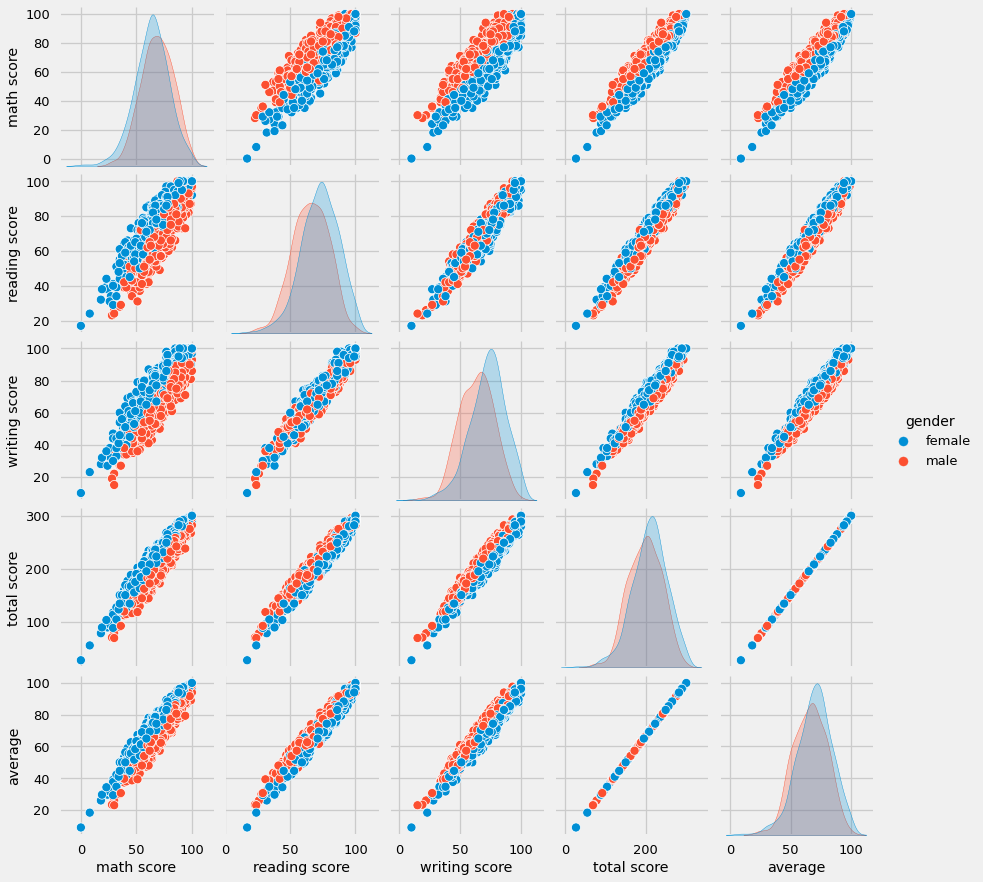

In [69]:
sns.pairplot(df,hue = 'gender')
plt.show()

- From the above plot it is clear that all the scores increase linearly with each other.

### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.